In [1]:
import json

In [2]:
with open('C:/Users/admin/Desktop/Data Analysis Projects/dataset.json', 'r') as f:
    data = json.load(f)

In [3]:
print(data)

[{'externalStatus': 'PORT OUT', 'internalStatus': 'Port Out'}, {'externalStatus': 'TERMINAL IN', 'internalStatus': 'Inbound Terminal'}, {'externalStatus': 'PORT IN', 'internalStatus': 'Port In'}, {'externalStatus': 'Vessel departure from first POL (Vessel name : TIAN FU HE)', 'internalStatus': 'Departure'}, {'externalStatus': 'Vessel arrival at final POD (Vessel name : TIAN FU HE)', 'internalStatus': 'Arrival'}, {'externalStatus': 'DEPARTCU', 'internalStatus': 'Departure'}, {'externalStatus': 'Gate in', 'internalStatus': 'Gate In'}, {'externalStatus': 'Load on MAERSK SEMBAWANG / 237E', 'internalStatus': 'Loaded on Vessel'}, {'externalStatus': 'Discharge', 'internalStatus': 'Departure'}, {'externalStatus': 'Gate out', 'internalStatus': 'Gate Out'}, {'externalStatus': 'Gate in', 'internalStatus': 'Gate In'}, {'externalStatus': 'Load on MSC SVEVA / 248E', 'internalStatus': 'Loaded on Vessel'}, {'externalStatus': 'Discharge', 'internalStatus': 'Departure'}, {'externalStatus': 'Gate out', '

In [4]:
import pandas as pd

C:\Users\admin\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [5]:
df = pd.read_json('C:/Users/admin/Desktop/Data Analysis Projects/dataset.json')

In [6]:
df

,externalStatus,internalStatus
0,PORT OUT,Port Out
1,TERMINAL IN,Inbound Terminal
2,PORT IN,Port In
3,Vessel departure from first POL (Vessel name :...,Departure
4,Vessel arrival at final POD (Vessel name : TIA...,Arrival
...,...,...
1217,Import Loaded on Rail,Loaded on Vessel
1218,Full Transshipment Loaded,Loaded on Vessel
1219,Full Transshipment Loaded,Loaded on Vessel
1220,Export Loaded on Vessel,Loaded on Vessel


In [7]:
df.head()

,externalStatus,internalStatus
0,PORT OUT,Port Out
1,TERMINAL IN,Inbound Terminal
2,PORT IN,Port In
3,Vessel departure from first POL (Vessel name :...,Departure
4,Vessel arrival at final POD (Vessel name : TIA...,Arrival


In [9]:
df.to_csv('C:/Users/admin/Desktop/Data Analysis Projects/dataset_set.csv', index=False)

# Data Cleaning

In [10]:
df = pd.read_csv('C:/Users/admin/Desktop/Data Analysis Projects/dataset_set.csv')
df

,External Status,Internal Status
0,PORT OUT,Port Out
1,TERMINAL IN,Inbound Terminal
2,PORT IN,Port In
3,Vessel departure from first POL (Vessel name :...,Departure
4,Vessel arrival at final POD (Vessel name : TIA...,Arrival
...,...,...
100,'MARINA ONE 001S' Arrival at Port of Dischargi...,Arrival
101,Unloaded from 'MARINA ONE 001S' at Port of Dis...,Unloaded on Vessel
102,Load on MOGENS MAERSK / 246W,Loaded on Vessel
103,Load on MSC ALEXANDRA / 248W,Loaded on Vessel


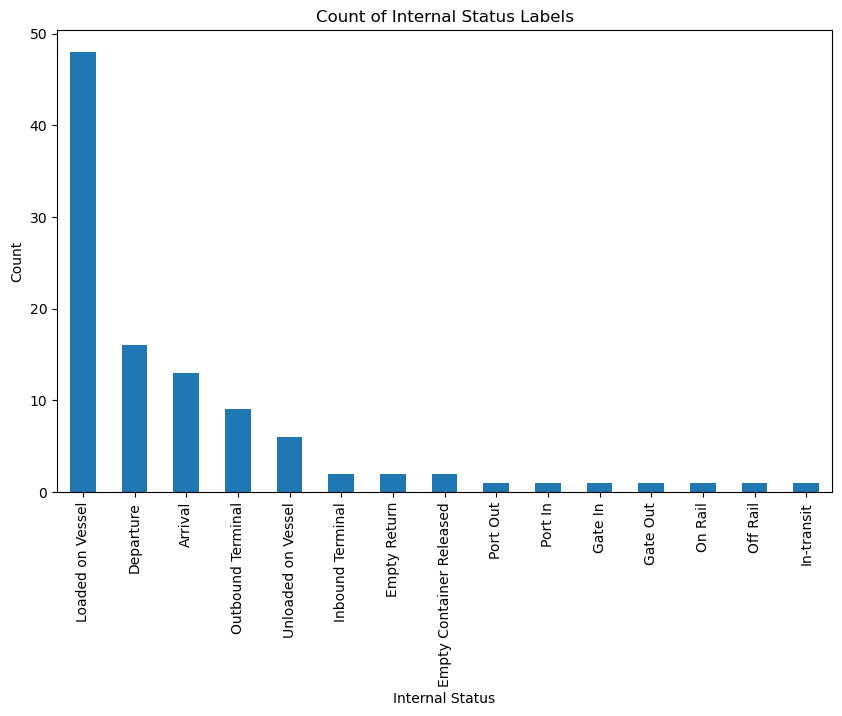

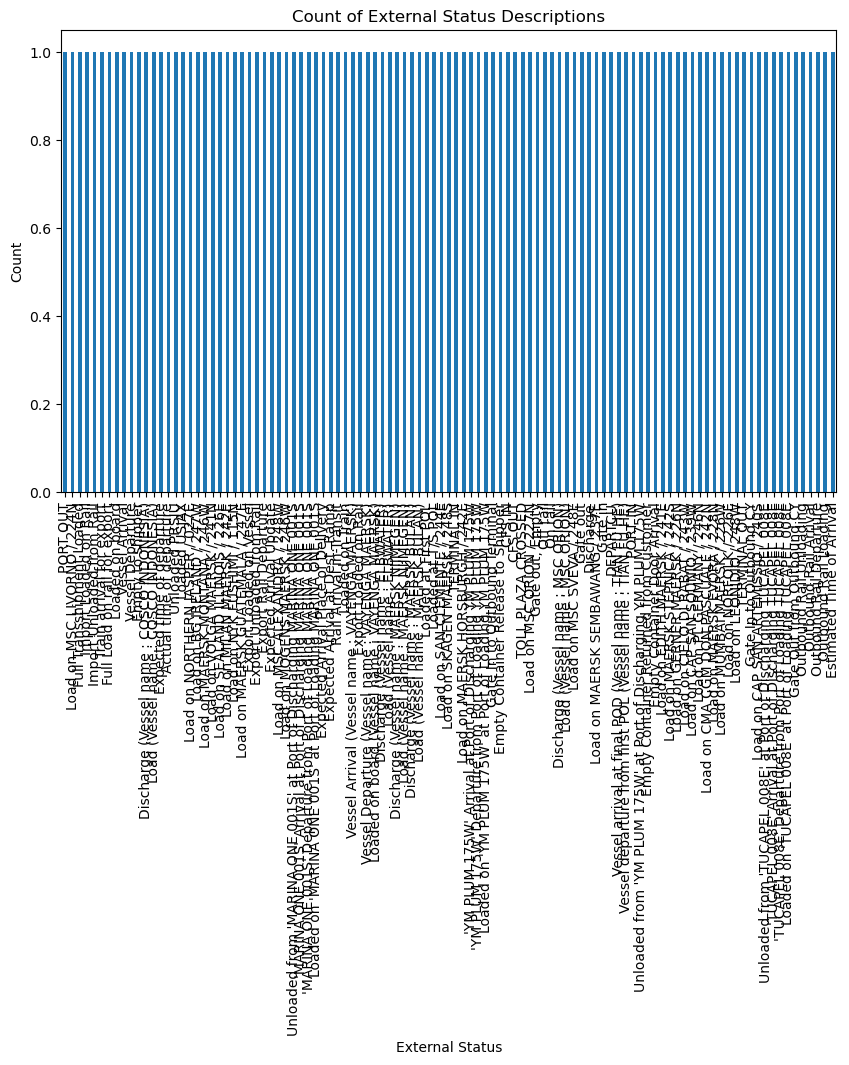

In [25]:
import matplotlib.pyplot as plt

# Plot the count of each internal status label
plt.figure(figsize=(10, 6))
df['Internal Status'].value_counts().plot(kind='bar')
plt.title('Count of Internal Status Labels')
plt.xlabel('Internal Status')
plt.ylabel('Count')
plt.show()

# Plot the count of each external status description
plt.figure(figsize=(10, 6))
df['External Status'].value_counts().plot(kind='bar')
plt.title('Count of External Status Descriptions')
plt.xlabel('External Status')
plt.ylabel('Count')
plt.show()

In [13]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
# Preprocess the dataset
X = df['External Status']
y = df['Internal Status']

In [15]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [17]:
# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_vectorized.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [22]:
from sklearn.preprocessing import LabelEncoder

# Concatenate the training and testing sets for the target variable
combined_labels = pd.concat([y_train, y_test])

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the combined target variable
combined_labels_encoded = label_encoder.fit_transform(combined_labels)

# Transform the target variable for training set
y_train_encoded = combined_labels_encoded[:len(y_train)]

# Transform the target variable for testing set
y_test_encoded = combined_labels_encoded[len(y_train):]

# Train the model
history = model.fit(X_train_vectorized, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_vectorized, y_test_encoded)
print("Test Accuracy:", accuracy)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 580ms/step - accuracy: 0.1030 - loss: 2.0253 - val_accuracy: 0.1765 - val_loss: 1.1587
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.1492 - loss: 1.2439 - val_accuracy: 0.1765 - val_loss: 0.6966
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.1524 - loss: 0.3539 - val_accuracy: 0.2353 - val_loss: 0.2725
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.1488 - loss: -0.2660 - val_accuracy: 0.1176 - val_loss: -0.1312
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.1336 - loss: -1.1648 - val_accuracy: 0.1176 - val_loss: -0.5166
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.1375 - loss: -1.8746 - val_accuracy: 0.1176 - val_loss: -0.9144
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.1414 - loss: -2.6694 - val_accuracy: 0.1176 - val_loss: -1.3297
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.1219 - loss: -3.1163 - val_accuracy: 0.1176 - val_

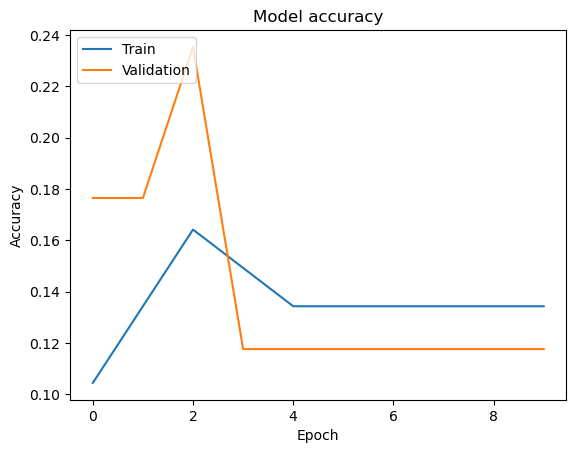

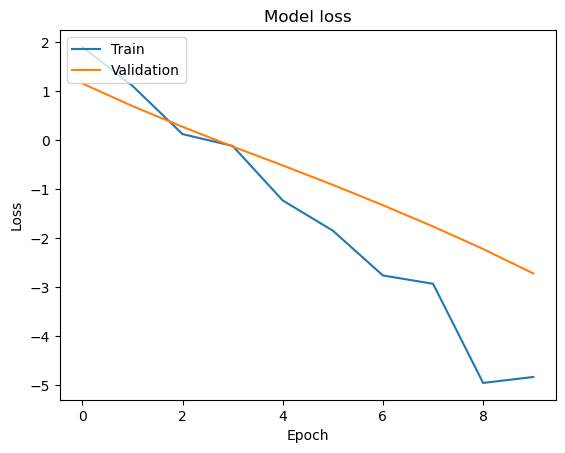

In [23]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()